In [1]:
import tensorflow as tf
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')

2023-08-05 17:14:55.607715: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-05 17:14:55.655245: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 17:14:56.488146: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-05 17:14:57.537689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

In [4]:
trainImages = trainImages.reshape((60000, 28, 28, 1))
testImages = testImages.astype("float32") / 255

trainLabels = to_categorical(trainLabels)


testImages = testImages.reshape((10000, 28, 28, 1))
testImages = testImages.astype("float32") / 255

testLabels = to_categorical(testLabels)

In [5]:
from keras import layers, models

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 64)                1982528   
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 2038922 (7.78 MB)
Trainable params: 203892

In [8]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [9]:
history = model.fit(trainImages, trainLabels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 47s 49ms/step - loss: 0.3627 - accuracy: 0.9535
Epoch 2/5
938/938 [==============================] - 34s 36ms/step - loss: 0.0456 - accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0275 - accuracy: 0.9919
Epoch 4/5
938/938 [==============================] - 32s 34ms/step - loss: 0.0185 - accuracy: 0.9949
Epoch 5/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0137 - accuracy: 0.9968


In [10]:
testLoss, testAcc = model.evaluate(testImages, testLabels)

313/313 [==============================] - 2s 7ms/step - loss: 2.3033 - accuracy: 0.1010


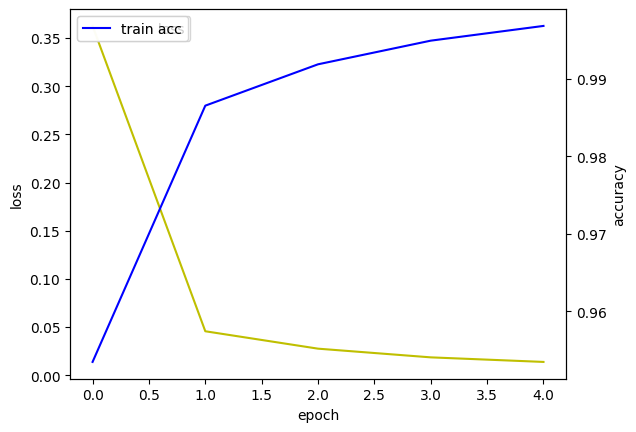

In [11]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [12]:
history.history

{'loss': [0.36266010999679565,
  0.04557260498404503,
  0.0275015477091074,
  0.018469905480742455,
  0.013731958344578743],
 'accuracy': [0.9534833431243896,
  0.9865333437919617,
  0.9918666481971741,
  0.9949166774749756,
  0.9968166947364807]}